In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import pickle
import matplotlib.pyplot as plt
import vehicle_list_data

In [9]:
!pip install notebook --upgrade

     |████████████████████████████████| 9.9 MB 5.4 MB/s eta 0:00:01
  Using cached Send2Trash-1.8.0-py3-none-any.whl (18 kB)
  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.4.3
    Uninstalling nest-asyncio-1.4.3:
      Successfully uninstalled nest-asyncio-1.4.3
  Attempting uninstall: Send2Trash
    Found existing installation: Send2Trash 1.5.0
    Uninstalling Send2Trash-1.5.0:
      Successfully uninstalled Send2Trash-1.5.0
  Attempting uninstall: notebook
    Found existing installation: notebook 6.1.5
    Uninstalling notebook-6.1.5:
      Successfully uninstalled notebook-6.1.5


In [10]:
import pickle5 as pickle
with open("scenario0_wcctci_05_01_2022_12_37_32.pkl", "rb") as fh:
    res = pickle.load(fh)

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/opt/anaconda3/lib/python3.7/site-packages/pandas/_libs/internals.cpython-37m-darwin.so'>

In [31]:
pkls = os.listdir("trials/anna_reverse_scenarios/")
num_scenarios = 5
per_scenario = {str(n):[] for n in range(num_scenarios)}
for scenario in range(num_scenarios):
    for pkl in pkls:
        if "scenario_"+str(scenario) in pkl:
            per_scenario[str(scenario)].append(pkl)

per_scenario = {key:sorted(per_scenario[key]) for key in per_scenario}
per_scenario

{'0': ['anna_reverse_scenario_0_algorithm_1_04_24_2022_23_51_36.pkl',
  'anna_reverse_scenario_0_algorithm_2_04_24_2022_23_52_25.pkl',
  'anna_reverse_scenario_0_algorithm_3_04_24_2022_23_53_06.pkl',
  'anna_reverse_scenario_0_algorithm_4_04_24_2022_23_53_50.pkl',
  'anna_reverse_scenario_0_algorithm_5_04_24_2022_23_54_41.pkl'],
 '1': ['anna_reverse_scenario_1_algorithm_1_04_24_2022_23_56_15.pkl',
  'anna_reverse_scenario_1_algorithm_2_04_24_2022_23_57_03.pkl',
  'anna_reverse_scenario_1_algorithm_3_04_24_2022_23_57_47.pkl',
  'anna_reverse_scenario_1_algorithm_4_04_24_2022_23_58_31.pkl',
  'anna_reverse_scenario_1_algorithm_5_04_24_2022_23_59_15.pkl'],
 '2': ['anna_reverse_scenario_2_algorithm_1_04_25_2022_00_00_47.pkl',
  'anna_reverse_scenario_2_algorithm_2_04_25_2022_00_01_33.pkl',
  'anna_reverse_scenario_2_algorithm_3_04_25_2022_00_02_26.pkl',
  'anna_reverse_scenario_2_algorithm_4_04_25_2022_00_03_13.pkl',
  'anna_reverse_scenario_2_algorithm_5_04_25_2022_00_04_00.pkl'],
 '3': [

In [32]:
with open("trials/anna_reverse_scenarios/anna_reverse_scenario_0_algorithm_4_04_24_2022_23_53_50.pkl", 'rb') as inp:
    res = pickle.load(inp)
res.metrics

{'station_utilization_disp_of_avg': 1.53125,
 'station_utilization_avg_of_disp': 1.5390625,
 'electricity': 0,
 'percent_delay': (1.002158683147895,
  1.4386600249171801,
  1.9937192309169136,
  1.4118310079936842,
  0.24615116725015398),
 'hours_spent_in_queues': (0.0,
  0.0,
  1.0,
  0.0028629856850715747,
  0.04945493952102686),
 'hours_spent_charging': (0, 0.0, 5, 0.11860940695296524, 0.623534116361998),
 'station_utilization': [0.0,
  2.5833333333333335,
  0.19791666666666666,
  0.0,
  0.0,
  0.0,
  0.33541666666666664,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.947916666666667,
  0.0,
  0.3229166666666667,
  0.0,
  0.0,
  1.3145833333333334,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.1125,
  0.09166666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  1.4354166666666666]}

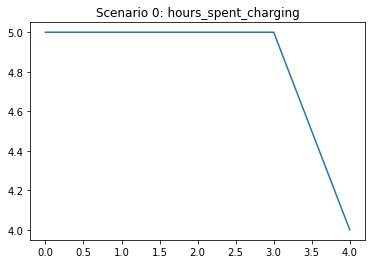

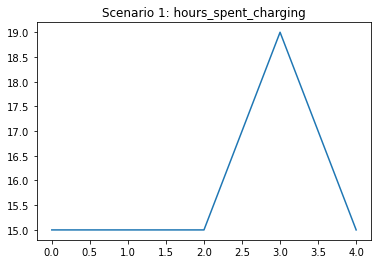

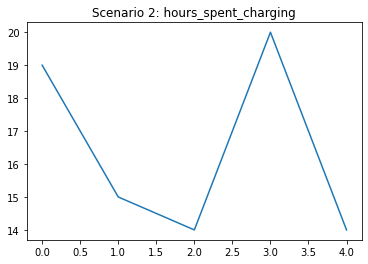

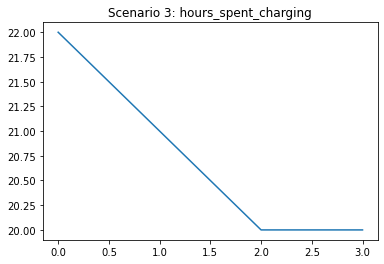

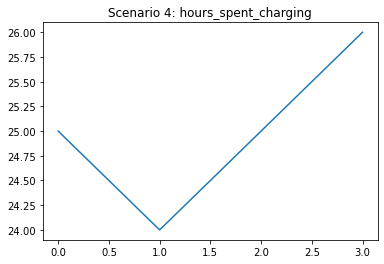

In [47]:
file_path = "trials/anna_reverse_scenarios/"
def graph_scenario(n, metric = "station_utilization_disp_of_avg", measurement=None):
    indices = {"min": 0, "med": 1, "max": 2, "mean": 3, "std":4}
    data = []
    for pkl in per_scenario[str(n)]:
        with open(file_path + pkl, 'rb') as inp:
            res = pickle.load(inp)
            if measurement != None:
                data.append(res.metrics[metric][indices[measurement]])
            else:
                data.append(res.metrics[metric])
    plt.plot(data)
    plt.title("Scenario " + str(n) + ": " + metric)
    plt.show()

for scenario in range(num_scenarios):
    graph_scenario(scenario, metric = "hours_spent_charging", measurement = "max")

In [3]:
with open("trials/anna_reverse_scenarios/anna_reverse_scenario_0_algorithm_4_04_24_2022_23_53_50.pkl", 'rb') as inp:
    res = pickle.load(inp)

In [8]:
vehicle_list_data.get_array(res)

array([['Long Beach:9', 'Long Beach:9', 'Long Beach:9', ..., '', '', ''],
       ['Long Beach:9', 'Long Beach:9', 'Long Beach:9', ..., '', '', ''],
       ['Long Beach:9', 'Long Beach:9', 'Long Beach:9', ..., '', '', ''],
       ...,
       ['', '', '', ..., '', '', 'Oregon:7'],
       ['', '', '', ..., '', '', 'Oregon:7'],
       ['', '', '', ..., '', '', 'Oregon:7']], dtype='<U19')

In [9]:
max([len(x) for x in vehicle_list_data.get_array(res)])

60

In [12]:
vehicle_list_data.get_index_edge_totals(res)

array([{('Long Beach', '9'): 7, ('San Diego', '17'): 0, ('Fresno', '33'): 3, ('Sacramento', '43'): 2, ('Sacramento', '5'): 2, ('Oregon', '7'): 0, ('', ''): 5786},
       {('Long Beach', '9'): 17, ('17', '9'): 0, ('33', '31'): 2, ('33', '41'): 0, ('Sacramento', '43'): 2, ('5', '33'): 0, ('5', '41'): 0, ('5', '11'): 0, ('Oregon', '7'): 0, ('Oakland', '41'): 5, ('Fresno', '33'): 3, ('Sacramento', '5'): 3, ('', ''): 5762},
       {('Long Beach', '9'): 17, ('17', '9'): 0, ('33', '31'): 2, ('33', '41'): 1, ('43', '38'): 2, ('5', '33'): 1, ('5', '41'): 0, ('5', '11'): 2, ('Oregon', '7'): 4, ('41', '11'): 3, ('41', '5'): 0, ('41', '38'): 0, ('33', '5'): 0, ('33', '38'): 0, ('33', '87'): 0, ('5', '7'): 0, ('Sacramento', '43'): 0, ('Sacramento', '5'): 0, ('', ''): 5756},
       {('9', '33'): 2, ('9', '17'): 2, ('9', '31'): 1, ('17', '9'): 0, ('33', '31'): 2, ('33', '41'): 1, ('43', '38'): 2, ('5', '33'): 1, ('5', '41'): 0, ('5', '11'): 3, ('7', '5'): 0, ('41', '11'): 3, ('41', '5'): 0, ('41', '3

In [13]:
len(vehicle_list_data.get_index_edge_totals(res))

60

In [14]:
vehicle_list_data.get_index_edge_totals(res)[0]

{('Long Beach', '9'): 7,
 ('San Diego', '17'): 0,
 ('Fresno', '33'): 3,
 ('Sacramento', '43'): 2,
 ('Sacramento', '5'): 2,
 ('Oregon', '7'): 0,
 ('', ''): 5786}

In [24]:
vehicle_list_data.get_node_totals(res)[0].keys()

dict_keys(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '46', '72', '87', '248'])

In [25]:
res.station_g.nodes

NodeView(('5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '46', '72', '87', '248'))